<a href="https://colab.research.google.com/github/matchbou/kaggle-study-20190410/blob/master/Utilizing%20ARIMA%20to%20forecast%20Uber's%20market%20demand-Kaggle.pdf201904131904.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# https://www.kaggle.com/kruthik93/utilizing-arima-to-forecast-uber-s-market-demand

# Utilizing ARIMA to forecast Uber's market demand

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [7]:
!ls -a ./drive/'My Drive'/kaggle/data

uber-pickups-in-new-york-city.zip


In [8]:
!pwd

/content


In [0]:
# kaggleデータ置き場とjupyernoteのカレントディレクトリフォルダを作成

!mkdir ./input
!mkdir ./notebook

In [0]:
#osライブラリ読込してinputに移動⇒kaggleデータもダウンロード　⇒ notebookフォルダに移動
import os
os.chdir('input')

In [11]:
!pwd

/content/input


In [12]:
!unzip ../drive/'My Drive'/kaggle/data/uber-pickups-in-new-york-city.zip -d ./

Archive:  ../drive/My Drive/kaggle/data/uber-pickups-in-new-york-city.zip
  inflating: ./Uber-Jan-Feb-FOIL.csv  
  inflating: ./other-American_B01362.csv  
  inflating: ./other-Carmel_B00256.csv  
  inflating: ./other-Dial7_B00887.csv  
  inflating: ./other-Diplo_B01196.csv  
  inflating: ./other-FHV-services_jan-aug-2015.csv  
  inflating: ./other-Federal_02216.csv  
  inflating: ./other-Firstclass_B01536.csv  
  inflating: ./other-Highclass_B01717.csv  
  inflating: ./other-Lyft_B02510.csv  
  inflating: ./other-Prestige_B01338.csv  
  inflating: ./other-Skyline_B00111.csv  
  inflating: ./uber-raw-data-apr14.csv  
  inflating: ./uber-raw-data-aug14.csv  
  inflating: ./uber-raw-data-janjune-15.csv  
  inflating: ./uber-raw-data-jul14.csv  
  inflating: ./uber-raw-data-jun14.csv  
  inflating: ./uber-raw-data-may14.csv  
  inflating: ./uber-raw-data-sep14.csv  


In [13]:
!ls -a

.				     other-Prestige_B01338.csv
..				     other-Skyline_B00111.csv
other-American_B01362.csv	     Uber-Jan-Feb-FOIL.csv
other-Carmel_B00256.csv		     uber-raw-data-apr14.csv
other-Dial7_B00887.csv		     uber-raw-data-aug14.csv
other-Diplo_B01196.csv		     uber-raw-data-janjune-15.csv
other-Federal_02216.csv		     uber-raw-data-jul14.csv
other-FHV-services_jan-aug-2015.csv  uber-raw-data-jun14.csv
other-Firstclass_B01536.csv	     uber-raw-data-may14.csv
other-Highclass_B01717.csv	     uber-raw-data-sep14.csv
other-Lyft_B02510.csv


In [0]:
#https://www.kaggle.com/c/titanic/data
#!kaggle datasets download -d divyeshardeshana/supply-chain-shipment-pricing-data

In [15]:
!pwd
!ls -a

/content/input
.				     other-Prestige_B01338.csv
..				     other-Skyline_B00111.csv
other-American_B01362.csv	     Uber-Jan-Feb-FOIL.csv
other-Carmel_B00256.csv		     uber-raw-data-apr14.csv
other-Dial7_B00887.csv		     uber-raw-data-aug14.csv
other-Diplo_B01196.csv		     uber-raw-data-janjune-15.csv
other-Federal_02216.csv		     uber-raw-data-jul14.csv
other-FHV-services_jan-aug-2015.csv  uber-raw-data-jun14.csv
other-Firstclass_B01536.csv	     uber-raw-data-may14.csv
other-Highclass_B01717.csv	     uber-raw-data-sep14.csv
other-Lyft_B02510.csv


In [0]:
os.chdir('../notebook')

In [17]:
#上記操作の結果以下のディレクトリ配置となる

# /content/notebook このipynbのカレントディレクトリ
# /content/input カグルからダウンロードしたcsvファイルの置き場所

!pwd
!ls -a ../input


/content/notebook
.				     other-Prestige_B01338.csv
..				     other-Skyline_B00111.csv
other-American_B01362.csv	     Uber-Jan-Feb-FOIL.csv
other-Carmel_B00256.csv		     uber-raw-data-apr14.csv
other-Dial7_B00887.csv		     uber-raw-data-aug14.csv
other-Diplo_B01196.csv		     uber-raw-data-janjune-15.csv
other-Federal_02216.csv		     uber-raw-data-jul14.csv
other-FHV-services_jan-aug-2015.csv  uber-raw-data-jun14.csv
other-Firstclass_B01536.csv	     uber-raw-data-may14.csv
other-Highclass_B01717.csv	     uber-raw-data-sep14.csv
other-Lyft_B02510.csv


In [0]:
#ここからカーネルの内容に踏み込む

In [19]:
#Importing necessary libraries
import pandas as pd


/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from math import sqrt

In [21]:
#Preparing the uber 2014 main dataset
def prepare_2014_df():
    
    #Loading datasets
    uber_2014_apr=pd.read_csv('../input/uber-raw-data-apr14.csv',header=0)
    uber_2014_may=pd.read_csv('../input/uber-raw-data-may14.csv',header=0)
    uber_2014_jun=pd.read_csv('../input/uber-raw-data-jun14.csv',header=0)
    uber_2014_jul=pd.read_csv('../input/uber-raw-data-jul14.csv',header=0)
    uber_2014_aug=pd.read_csv('../input/uber-raw-data-aug14.csv',header=0)
    uber_2014_sep=pd.read_csv('../input/uber-raw-data-sep14.csv',header=0)

    
    #Merging
    df = uber_2014_apr.append([uber_2014_may,uber_2014_jun,uber_2014_jul,uber_2014_aug,uber_2014_sep], ignore_index=True)
    
    #returning merged dataframe
    return df

#Uber 2014 dataset
uber_2014_master = prepare_2014_df()
uber_2014_master.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [22]:
# Feature Engineering
def create_day_series(df):
    
    # Grouping by Date/Time to calculate number of trips
    day_df = pd.Series(df.groupby(['Date/Time']).size())
    # setting Date/Time as index
    day_df.index = pd.DatetimeIndex(day_df.index)
    # Resampling to daily trips
    day_df = day_df.resample('1D').apply(np.sum)
    
    return day_df

day_df_2014 = create_day_series(uber_2014_master)
day_df_2014.head()

Date/Time
2014-04-01    14546
2014-04-02    17474
2014-04-03    20701
2014-04-04    26714
2014-04-05    19521
Freq: D, dtype: int64

p-value: 0.8458980824898366


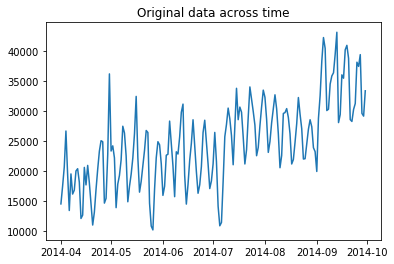

<Figure size 432x288 with 0 Axes>

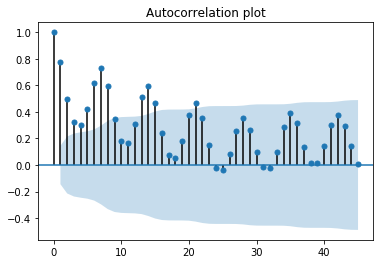

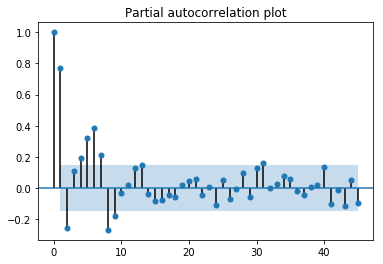

In [23]:
#Checking trend and autocorrelation
def initial_plots(time_series, num_lag):

    #Original timeseries plot
    plt.figure(1)
    plt.plot(time_series)
    plt.title('Original data across time')
    plt.figure(2)
    plot_acf(time_series, lags = num_lag)
    plt.title('Autocorrelation plot')
    plot_pacf(time_series, lags = num_lag)
    plt.title('Partial autocorrelation plot')
    
    plt.show()

    
#Augmented Dickey-Fuller test for stationarity
#checking p-value
print('p-value: {}'.format(adfuller(day_df_2014)[1]))

#plotting
initial_plots(day_df_2014, 45)

In [24]:
#storing differenced series
diff_series = day_df_2014.diff(periods=1)

#Augmented Dickey-Fuller test for stationarity
#checking p-value
print('p-value: {}'.format(adfuller(diff_series.dropna())[1]))

p-value: 1.5163641177435116e-08


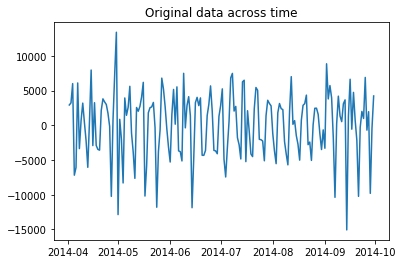

<Figure size 432x288 with 0 Axes>

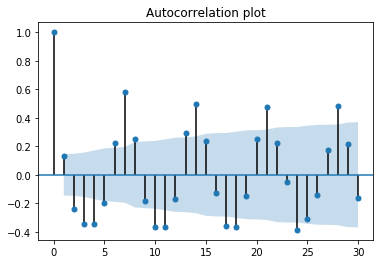

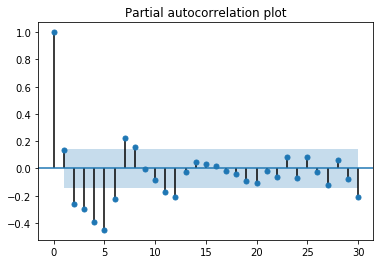

In [25]:
initial_plots(diff_series.dropna(), 30)

In [26]:
#Fitting SARIMAX models

#Defining RMSE
def rmse(x,y):
    return sqrt(mean_squared_error(x,y))

#fitting ARIMA model on dataset
def SARIMAX_call(time_series,p_list,d_list,q_list,P_list,D_list,Q_list,s_list,test_period):    
    
    #Splitting into training and testing
    training_ts = time_series[:-test_period]
    
    testing_ts = time_series[len(time_series)-test_period:]
    
    error_table = pd.DataFrame(columns = ['p','d','q','P','D','Q','s','AIC','BIC','RMSE'],\
                                                           index = range(len(ns_ar)*len(ns_diff)*len(ns_ma)*len(s_ar)\
                                                                         *len(s_diff)*len(s_ma)*len(s_list)))
    count = 0
    
    for p in p_list:
        for d in d_list:
            for q in q_list:
                for P in P_list:
                    for D in D_list:
                        for Q in Q_list:
                            for s in s_list:
                                #fitting the model
                                SARIMAX_model = SARIMAX(training_ts.astype(float),\
                                                        order=(p,d,q),\
                                                        seasonal_order=(P,D,Q,s),\
                                                        enforce_invertibility=False)
                                SARIMAX_model_fit = SARIMAX_model.fit(disp=0)
                                AIC = np.round(SARIMAX_model_fit.aic,2)
                                BIC = np.round(SARIMAX_model_fit.bic,2)
                                predictions = SARIMAX_model_fit.forecast(steps=test_period,typ='levels')
                                RMSE = rmse(testing_ts.values,predictions.values)                                

                                #populating error table
                                error_table['p'][count] = p
                                error_table['d'][count] = d
                                error_table['q'][count] = q
                                error_table['P'][count] = P
                                error_table['D'][count] = D
                                error_table['Q'][count] = Q
                                error_table['s'][count] = s
                                error_table['AIC'][count] = AIC
                                error_table['BIC'][count] = BIC
                                error_table['RMSE'][count] = RMSE
                                
                                count+=1 #incrementing count        
    
    #returning the fitted model and values
    return error_table

ns_ar = [0,1,2]
ns_diff = [1]
ns_ma = [0,1,2]
s_ar = [0,1]
s_diff = [0,1] 
s_ma = [1,2]
s_list = [7]

error_table = SARIMAX_call(day_df_2014,ns_ar,ns_diff,ns_ma,s_ar,s_diff,s_ma,s_list,30)

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", Conve

In [27]:
# printing top 5 lowest RMSE from error table
error_table.sort_values(by='RMSE').head(5)

,p,d,q,P,D,Q,s,AIC,BIC,RMSE
5,0,1,0,1,0,2,7,2903.31,2915.43,5053.93
3,0,1,0,0,1,2,7,2752.78,2761.87,5105.3
7,0,1,0,1,1,2,7,2754.8,2766.92,5136.57
6,0,1,0,1,1,1,7,2754.5,2763.6,5278.11
2,0,1,0,0,1,1,7,2752.71,2758.77,5336.34


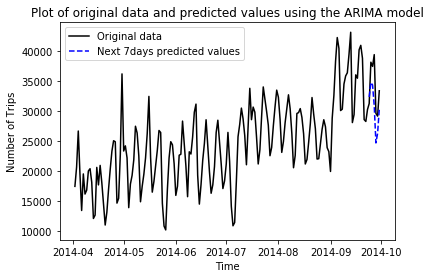

In [28]:
#Predicting values using the fitted model
def predict(time_series,p,d,q,P,D,Q,s,n_days,conf):
    
    #Splitting into training and testing
    training_ts = time_series[:-n_days]
    
    testing_ts = time_series[len(time_series)-n_days:]
    
    #fitting the model
    SARIMAX_model = SARIMAX(training_ts.astype(float),\
                            order=(p,d,q),\
                            seasonal_order=(P,D,Q,s),\
                            enforce_invertibility=False)
    SARIMAX_model_fit = SARIMAX_model.fit(disp=0)
    
    #Predicting
    SARIMAX_prediction = pd.DataFrame(SARIMAX_model_fit.forecast(steps=n_days,alpha=(1-conf)).values,\
                          columns=['Prediction'])
    SARIMAX_prediction.index = pd.date_range(training_ts.index.max()+1,periods=n_days)
    
    #Plotting
    plt.figure(4)
    plt.title('Plot of original data and predicted values using the ARIMA model')
    plt.xlabel('Time')
    plt.ylabel('Number of Trips')
    plt.plot(time_series[1:],'k-', label='Original data')
    plt.plot(SARIMAX_prediction,'b--', label='Next {}days predicted values'.format(n_days))
    plt.legend()
    plt.show()
    
    #Returning predicitons
    return SARIMAX_prediction

#Predicting the values and builing an 80% confidence interval
prediction = predict(day_df_2014,0,1,0,0,1,2,7,7,0.80)